In [2]:
import pandas as pd
import numpy as np

# pd.date_range()

In [3]:
pd.date_range(start = '1/1/2018', end = '1/02/2018') #this returns an object

DatetimeIndex(['2018-01-01', '2018-01-02'], dtype='datetime64[ns]', freq='D')

In [5]:
for x in pd.date_range(start = '1/1/2018', end = '1/02/2018'):
    print(x)

2018-01-01 00:00:00
2018-01-02 00:00:00


In [7]:
for x in pd.date_range(start = '1/1/2018', end = '1/02/2018', periods = 4):
    print(x)

2018-01-01 00:00:00
2018-01-01 08:00:00
2018-01-01 16:00:00
2018-01-02 00:00:00


In [9]:
for x in pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 23:59:59', freq = 'H'):
    print(x)

2018-01-01 00:00:00
2018-01-01 01:00:00
2018-01-01 02:00:00
2018-01-01 03:00:00
2018-01-01 04:00:00
2018-01-01 05:00:00
2018-01-01 06:00:00
2018-01-01 07:00:00
2018-01-01 08:00:00
2018-01-01 09:00:00
2018-01-01 10:00:00
2018-01-01 11:00:00
2018-01-01 12:00:00
2018-01-01 13:00:00
2018-01-01 14:00:00
2018-01-01 15:00:00
2018-01-01 16:00:00
2018-01-01 17:00:00
2018-01-01 18:00:00
2018-01-01 19:00:00
2018-01-01 20:00:00
2018-01-01 21:00:00
2018-01-01 22:00:00
2018-01-01 23:00:00


# Seasonality

In [14]:
df = pd.read_csv('../lab-time-series/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [15]:
df['date'].dtype

dtype('O')

In [19]:
# df.index = pd.to_datetime(df['date'])
# df.drop(columns = 'date', inplace = True)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


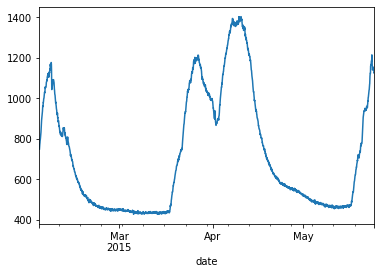

In [21]:
co2 = df['CO2']
co2.plot()

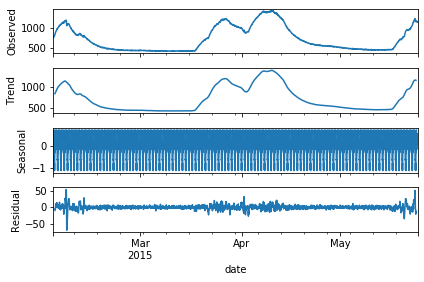

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

_ = seasonal_decompose(co2).plot()

# Stationary

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller(co2)[1] # p-value (hyp: data is not stationary)

0.06822624483241077

# Lag Plot

- lag plot is a special scatter plot where one set of observations in a time series is plotted ("lagged") against a second, later set of data
- data is autocorrleated if the values that occured closer together in time are rare, in fact, closer than the values that ocurred farther apart in time
- a positive linear trend suggests positive autocorrelation
- a negative linear trend suggests negative autocorrelation
- the tighter the data is clustered around the diagonal, the more autocorrelation is present

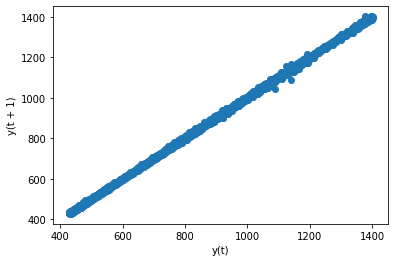

In [27]:
from pandas.plotting import lag_plot

lag_plot(co2) 

# Autoregressive moving average (ARMA)

- Tool for understanding and predicting future values in a time series
- AR part involves regressing the variable on its own lagged (past) values
- MA part involves modeling the residuals (prediction errors)
- usually referred as ARMA(p,q) model, where p is the order of the AR part and q is the order of the MA part

In [28]:
from statsmodels.tsa.arima_model import ARMA

train = co2[:-3]
test = co2[-3:]

model = ARMA(  #model is a generic formula molded into our data set
    train,
    freq = 'H',
    order = (2,1)  # 1 is the degree of white noise
).fit()

/Users/anielkaaslan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
predictions = model.predict(
    start = len(train),
    end = len(train) + len(test) - 1
)

pd.DataFrame({
    'observed': test,
    'predicted': predictions
})

,observed,predicted
2015-05-24 11:00:00,1125.8,1128.253982
2015-05-24 12:00:00,1123.0,1127.281503
2015-05-24 13:00:00,1124.0,1126.282827


# ROOT MEAN SQUARE ROOT

- Measures how spread out the residuals (predicition errors) are
- STD DEV (sq root of variance) of the residuals
- Tells you how concentrated the data is around the line of best fit
- Lower the values indicate better fit
- is a good measure of how accurately the model predicts the response

In [30]:
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions) #this will tell how accurate the predicitons are

3.1392459419915335

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [10]:
# df = pd.read_excel('/Users/anielkaaslan/Downloads/Sample - Superstore.xls')
data = pd.read_csv('/Users/anielkaaslan/Documents/data-labs/module-2/pythons.csv')

In [12]:
# data['ObsDate'].min(), data['ObsDate'].max()
# furniture['Order Date'].min(), furniture['Order Date'].max()
# furniture.head()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [18]:
cols = ['CoordAcc','OrigName', 'Method', 'DataType', 'LocalOwner', 'Habitat', 'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density', 'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity', 'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType','CollectTme', 'Surveyor', 'RecSource', 'DateAcc', 'DateUp', 'Host', 'Host_Name', 'Reviewer', 'ReviewDate', 'OrgSrcID' , 'PID' , 'Voucher' , 'Museum' , 'MuseumRec', 'Reference'] 
data['ObsDate'] = pd.to_datetime(data['ObsDate'])
# cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
# data.drop(cols, axis=1, inplace=True)
sights = data.sort_values('ObsDate')

In [15]:
sights = data.set_index('ObsDate')
furniture.index

y = sights['objectid'].resample('MS').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'